<a href="https://colab.research.google.com/github/hannahwang1/Trauma-Injury-Trend/blob/main/Trauma_Injury_Trend_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explanatory Data Analysis

In [2]:
import pandas as pd

# Load the module
from google.colab import drive

# Mount the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# load file using relative path 
df = pd.read_csv('/content/drive/MyDrive/MPH MBA/MPH/580: Practicum/Trauma Data/sb5yr.csv')
df.head(10)

,Admit,Age,Race,Hispanic,HomeZip,InjuryZip,MOI,ECode,Activity,Site,HLOS,ISS,DCDispo,WorkInjury,TimetoED,agegrp,catage
0,04/26/2016,0,OTHER,Y,11901.0,NaN,NaN,X58.XXXA,*BL,Y92.9,2,4,"HOME, NO SVC",N,6,<1 year,1
1,07/25/2015,21,WHITE,N,32934.0,NaN,ASSAULT,*BL,*BL,*BL,14,17,"HOME, NO SVC",N,2,20 to 2,2
2,07/05/2015,37,WHITE,N,11961.0,11961.0,ASSAULT,*BL,*BL,*BL,5,1,"HOME, NO SVC",N,2,35 to 4,2
3,07/08/2015,20,BLACK,N,11727.0,NaN,ASSAULT,*BL,*BL,*BL,2,5,"HOME, NO SVC",N,2,20 to 2,2
4,07/19/2015,49,BLACK,N,11968.0,11968.0,ASSAULT,*BL,*BL,*BL,3,10,"HOME, NO SVC",N,2,45 to 5,2
5,07/20/2015,31,WHITE,N,11727.0,11944.0,ASSAULT,*BL,*BL,*BL,3,5,"HOME, NO SVC",N,2,25 to 3,2
6,07/28/2015,37,BLACK,N,11950.0,NaN,ASSAULT,*BL,*BL,*BL,5,1,"HOME, NO SVC",N,*ND,35 to 4,2
7,08/06/2015,19,WHITE,N,11764.0,NaN,ASSAULT,*BL,*BL,*BL,2,10,"HOME, NO SVC",N,3,15 to 1,2
8,08/08/2015,26,WHITE,N,11784.0,NaN,ASSAULT,*BL,*BL,*BL,7,16,"HOME, NO SVC",N,6,25 to 3,2
9,08/10/2015,35,WHITE,N,10026.0,NaN,ASSAULT,*BL,*BL,*BL,4,8,"HOME, NO SVC",N,4,35 to 4,2


Age and Age Groups (agegrp)

In [55]:
# Create the frequency table
Age_freq = df['Age'].value_counts().sort_index()

# Print the frequency table
print(Age_freq)

0      142
1      120
10      22
100     11
101      6
      ... 
95      44
96      44
97      34
98      19
99      21
Name: Age, Length: 107, dtype: int64


In [52]:
# Create a frequency table for the agegrp column in percentage form
agegrp_freq = df["agegrp"].value_counts(normalize=True).sort_index()

# Print the resulting frequency table
print(agegrp_freq)

1 to 4     0.032637
10 to 1    0.022858
15 to 1    0.039237
20 to 2    0.043882
25 to 3    0.068451
35 to 4    0.063073
45 to 5    0.079941
5 to 9     0.020291
55 to 6    0.103899
65 to 7    0.123823
75 to 8    0.184696
85+ yea    0.199853
<1 year    0.017357
Name: agegrp, dtype: float64


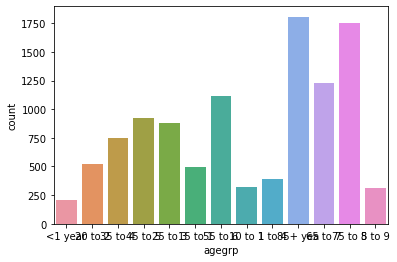

In [73]:
import seaborn as sns
# Plot the frequency table as a histogram
sns.countplot(x="agegrp", data=df)

# Show the plot
plt.show()

In [52]:
# Remove observations with *BL
df = df[df['Age'] != '*BL']

In [18]:
from statistics import mean, median, stdev

# Calculate the mean age
mean_age = df["Age"].mean()
print("Mean age:", mean_age)

# Calculate the median age
median_age = df["Age"].median()
print("Median age:", median_age)


Mean age: inf
Median age: 65.0


Race

In [81]:
# Create a frequency table for the race column in percentage form
Race_freq = df["Race"].value_counts(normalize=True).sort_index()

# Print the resulting frequency table
print(Race_freq)

ASIAN               0.008083
ASIAN OR PACIFIC    0.008273
BLACK               0.057056
INDIAN/ESK/ALE      0.001712
OTHER               0.110974
PACIFIC ISLANDER    0.000475
WHITE               0.813427
Name: Race, dtype: float64


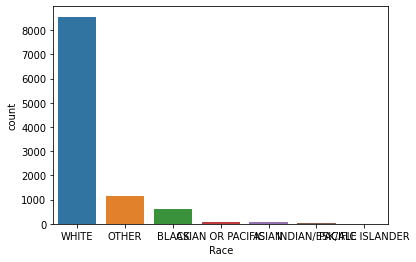

In [80]:
# Plot the frequency table as a histogram
sns.countplot(x="Race", data=df, order=df["Race"].value_counts().index)

# Show the plot
plt.show()

In [77]:
# Remove observations with *ND
df = df[df['Race'] != '*ND']

In [18]:
# One-hot encode the "race" column
df_encoded = pd.get_dummies(df, columns=['Race'], prefix='Race')


In [14]:
df_encoded.head()

,Admit,Age,Hispanic,HomeZip,InjuryZip,MOI,ECode,Activity,Site,HLOS,...,agegrp,catage,Race_*ND,Race_ASIAN,Race_ASIAN OR PACIFIC,Race_BLACK,Race_INDIAN/ESK/ALE,Race_OTHER,Race_PACIFIC ISLANDER,Race_WHITE
0,04/26/2016,0,Y,11901.0,NaN,NaN,X58.XXXA,*BL,Y92.9,2,...,<1 year,1,0,0,0,0,0,1,0,0
1,07/25/2015,21,N,32934.0,NaN,ASSAULT,*BL,*BL,*BL,14,...,20 to 2,2,0,0,0,0,0,0,0,1
2,07/05/2015,37,N,11961.0,11961.0,ASSAULT,*BL,*BL,*BL,5,...,35 to 4,2,0,0,0,0,0,0,0,1
3,07/08/2015,20,N,11727.0,NaN,ASSAULT,*BL,*BL,*BL,2,...,20 to 2,2,0,0,0,1,0,0,0,0
4,07/19/2015,49,N,11968.0,11968.0,ASSAULT,*BL,*BL,*BL,3,...,45 to 5,2,0,0,0,1,0,0,0,0


Hispanic Origin

In [41]:
# Create a frequency table for the Hispanic column in percentage form
Hispanic_freq = df["Hispanic"].value_counts(normalize=True).sort_index()

# Print the resulting frequency table
print(Hispanic_freq)

0    0.875703
1    0.124297
Name: Hispanic, dtype: float64


In [85]:
# Replace the values "Hispanic" and "Non-Hispanic" with 1 and 0
df['Hispanic'] = df['Hispanic'].replace({'Y': 1, 'N': 0})


In [83]:
# Remove observations with *ND
df = df[df['Hispanic'] != '*ND']

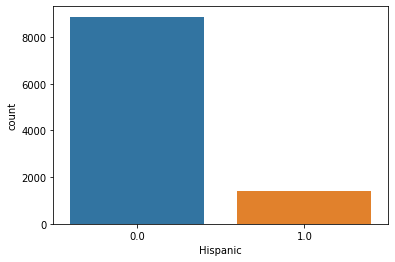

In [86]:
# Plot the frequency table as a histogram
sns.countplot(x="Hispanic", data=df, order=df["Hispanic"].value_counts().index)

# Show the plot
plt.show()

In [22]:
df.head()

,Admit,Age,Race,Hispanic,HomeZip,InjuryZip,MOI,ECode,Activity,Site,HLOS,ISS,DCDispo,WorkInjury,TimetoED,agegrp,catage
2,07/05/2015,37,WHITE,0,11961.0,11961.0,ASSAULT,*BL,*BL,*BL,5,1,"HOME, NO SVC",N,2,35 to 4,2
4,07/19/2015,49,BLACK,0,11968.0,11968.0,ASSAULT,*BL,*BL,*BL,3,10,"HOME, NO SVC",N,2,45 to 5,2
5,07/20/2015,31,WHITE,0,11727.0,11944.0,ASSAULT,*BL,*BL,*BL,3,5,"HOME, NO SVC",N,2,25 to 3,2
11,09/01/2015,43,BLACK,0,11901.0,11901.0,ASSAULT,*BL,*BL,*BL,2,10,"HOME, NO SVC",N,2,35 to 4,2
17,10/17/2015,42,BLACK,1,11951.0,11980.0,ASSAULT,Y04.0XXA,*BL,Y92.9,10,17,"HOME, NO SVC",N,3,35 to 4,2


In [28]:
# Calculate the mean 
mean_Hispanic = df["Hispanic"].mean()
print("Mean Hispanic Origin:", mean_Hispanic)

# Calculate the median 
median_Hispanic = df["Hispanic"].median()
print("Median Hispanic Origin:", median_Hispanic)

Mean Hispanic Origin: 0.12782503037667073
Median Hispanic Origin: 0.0


Mechnism of Injury (MOI)

In [69]:
# Create the frequency table for MOI in percentage form
MOI_freq = df['MOI'].value_counts(normalize=True).sort_index()

# Print the frequency table
print(MOI_freq)

ASSAULT       0.046233
BOAT          0.000936
BURN          0.062050
DROWNING      0.003088
FALL          0.552737
HANGING       0.000842
MCC           0.050164
MVC           0.136079
OTHER         0.062143
PEDALCYCLE    0.024146
SPORTS        0.022836
STRUCK BY     0.038746
Name: MOI, dtype: float64


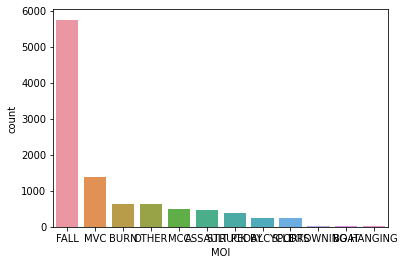

In [87]:
# Plot the frequency table as a histogram
sns.countplot(x="MOI", data=df, order=df["MOI"].value_counts().index)

# Show the plot
plt.show()

In [70]:
# Create a new variable with frequency of MOI
df['MOI Frequency'] = df['MOI'].map(df['MOI'].value_counts())

In [71]:
df.head()

,Admit,Age,Race,Hispanic,HomeZip,InjuryZip,MOI,ECode,Activity,Site,HLOS,ISS,DCDispo,WorkInjury,TimetoED,agegrp,catage,MOI Frequency
0,04/26/2016,0,OTHER,Y,11901.0,NaN,NaN,X58.XXXA,*BL,Y92.9,2,4,"HOME, NO SVC",N,6,<1 year,1,NaN
1,07/25/2015,21,WHITE,N,32934.0,NaN,ASSAULT,*BL,*BL,*BL,14,17,"HOME, NO SVC",N,2,20 to 2,2,494.0
2,07/05/2015,37,WHITE,N,11961.0,11961.0,ASSAULT,*BL,*BL,*BL,5,1,"HOME, NO SVC",N,2,35 to 4,2,494.0
3,07/08/2015,20,BLACK,N,11727.0,NaN,ASSAULT,*BL,*BL,*BL,2,5,"HOME, NO SVC",N,2,20 to 2,2,494.0
4,07/19/2015,49,BLACK,N,11968.0,11968.0,ASSAULT,*BL,*BL,*BL,3,10,"HOME, NO SVC",N,2,45 to 5,2,494.0


Hospital Length of Stay in days (HLOS)

In [48]:
# Create the frequency table
HLOS_freq = df['HLOS'].value_counts().sort_index()

# Print the frequency table
print(HLOS_freq)

1      292
10     252
100      1
104      1
105      1
      ... 
92       1
94       2
95       1
97       1
99       1
Name: HLOS, Length: 115, dtype: int64


In [45]:
# Remove observations with *BL
df = df[df['HLOS'] != '*BL']

In [69]:
string_values = df[df['HLOS'].apply(lambda x: isinstance(x, str))]['HLOS'].unique()

# Create a frequency table for the string values
freq_table = df[df['HLOS'].isin(string_values)]['HLOS'].value_counts().sort_index()

In [70]:
freq_table

1      441
10     316
100      1
104      1
105      1
      ... 
92       1
94       2
95       1
97       1
99       1
Name: HLOS, Length: 125, dtype: int64

Injury Severity Score (ISS)

In [57]:
# Create the frequency table
ISS_freq = df['ISS'].value_counts().sort_index()

# Print the frequency table
print(ISS_freq)

1     1088
10    1097
11      91
12     110
13     240
14     483
16     132
17     411
18      71
19      87
2      263
20      23
21     112
22     141
24      47
25     114
26     142
27      46
29      93
3       15
30      45
32       2
33      36
34      43
35      15
36       9
38      31
4     1664
41      20
42       6
43      17
45      12
48       4
5     1370
50      21
54       5
57       7
59       3
6      165
66       3
75      18
8      159
9     2215
Name: ISS, dtype: int64


In [56]:
# Remove observations with *BL, *NA, *ND
df = df[df['ISS'] != '*BL']
df = df[df['ISS'] != '*NA']
df = df[df['ISS'] != '*ND']

Work Injury

In [104]:
# Create the frequency table
WorkInjury_freq = df['WorkInjury'].value_counts()

# Print the frequency table
print(WorkInjury_freq)

0    9727
1     540
Name: WorkInjury, dtype: int64


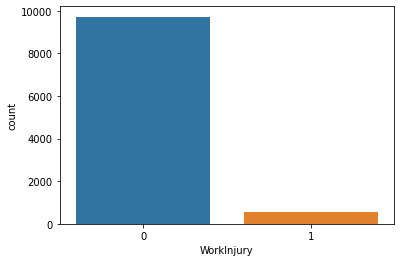

In [105]:
# Plot the frequency table as a histogram
sns.countplot(x="WorkInjury", data=df, order=df["WorkInjury"].value_counts().index)

# Show the plot
plt.show()

In [103]:
# Remove observations with *ND
df = df[df['WorkInjury'] != '*ND']

In [98]:
# Replace the values "Y" and "N" with 1 and 0
df['WorkInjury'] = df['WorkInjury'].replace({'Y': 1, 'N': 0})

Time to ED

In [11]:
# Create the frequency table
freq_table = df['TimetoED'].value_counts().sort_index()

# Print the frequency table
print(freq_table)

1       469
2      5451
3      1595
4      1565
4.1      52
4.2      58
5       432
6       856
Name: TimetoED, dtype: int64


In [10]:
# Remove observations with *BL, *NA, *ND
df = df[df['TimetoED'] != '*BL']
df = df[df['TimetoED'] != '*NA']
df = df[df['TimetoED'] != '*ND']

Null Values

In [16]:
# Check for null values
null_mask = df.isnull().sum()

# Print the null mask
print(null_mask)

Admit         0
Age           0
Race          0
Hispanic      0
HomeZip       0
InjuryZip     0
MOI           0
ECode         0
Activity      0
Site          0
HLOS          0
ISS           0
DCDispo       0
WorkInjury    0
TimetoED      0
agegrp        0
catage        0
dtype: int64


In [14]:
# Drop rows with any null values
df = df.dropna()